# Chromosome size bootstraping

Library imports and read data:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('ChromosomeSizeInfo_all.csv', delimiter=';')

## Data exploration

Example with just cluster 1:

In [4]:
# Just comparing the cluster 1 for the moment
mutant_cluster1 = data[data['group']=="Mutant"][data['cluster']==1]['ratio']
wildtype_cluster1 = data[data['group']=="WT"][data['cluster']==1]['ratio']
mutant_cluster1 = mutant_cluster1.dropna()
wildtype_cluster1 = wildtype_cluster1.dropna()

/var/folders/fd/pn4rz8313rxgbjcyps80fdnm0000gn/T/ipykernel_48988/2859216712.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mutant_cluster1 = data[data['group']=="Mutant"][data['cluster']==1]['ratio']
/var/folders/fd/pn4rz8313rxgbjcyps80fdnm0000gn/T/ipykernel_48988/2859216712.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wildtype_cluster1 = data[data['group']=="WT"][data['cluster']==1]['ratio']


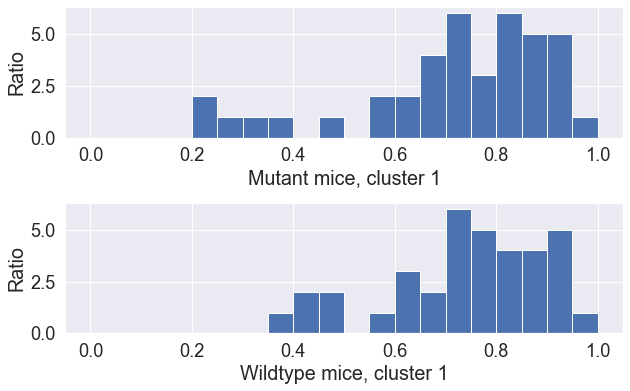

mutant_cluster1: 0.7149525478811581
wildtype_cluster1: 0.7388556619139538


In [5]:
#Figure settings
sns.set(font_scale=1.65)
fig = plt.figure(figsize=(10,6))
fig.subplots_adjust(hspace=.5)    

#Plot top histogram
ax = fig.add_subplot(2, 1, 1)
ax = mutant_cluster1.hist(range=(0, 1),bins=20)
#ax.set_xlim(0,800)
plt.xlabel('Mutant mice, cluster 1')
plt.ylabel('Ratio')

#Plot bottom histogram
ax2 = fig.add_subplot(2, 1, 2)
ax2 = wildtype_cluster1.hist(range=(0, 1),bins=20)
#ax2.set_xlim(0,800)

plt.xlabel('Wildtype mice, cluster 1')
plt.ylabel('Ratio')

plt.show()
print('mutant_cluster1: {}'.format(mutant_cluster1.mean()))
print('wildtype_cluster1: {}'.format(wildtype_cluster1.mean()))

Same, but with all 5 clusters:

In [6]:
mutant_clusters = data[data['group']=="Mutant"][['cluster','ratio']]
wildtype_clusters = data[data['group']=="WT"][['cluster','ratio']]
mutant_clusters = mutant_clusters.dropna()
wildtype_clusters = wildtype_clusters.dropna()

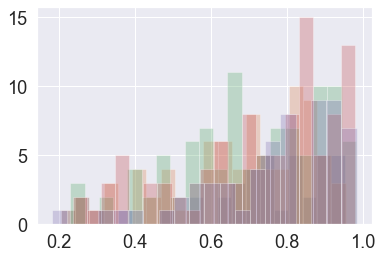

In [7]:
for cluster in data['cluster'].unique():
    plt.hist(data=mutant_clusters[mutant_clusters['cluster']==cluster], x='ratio', alpha = 0.3, bins=20)

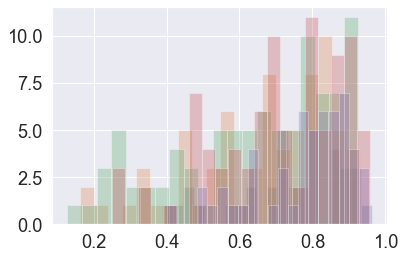

In [8]:
for cluster in data['cluster'].unique():
    plt.hist(data=wildtype_clusters[wildtype_clusters['cluster']==cluster], x='ratio', alpha = 0.3, bins=20)

## Hypothesis testing - Mutant VS Wildtype chromosome cluster ratio


In [9]:
from sklearn.utils import resample

Sample with just cluster 1:

In [10]:
combined = np.concatenate((mutant_cluster1, wildtype_cluster1), axis=0)

perms_mutant = []
perms_wildtype = []

for i in range(10000):
    np.random.seed(i)
    perms_mutant.append(resample(combined, n_samples = len(mutant_cluster1)))
    perms_wildtype.append(resample(combined, n_samples = len(wildtype_cluster1)))
    
dif_bootstrap_means = (np.mean(perms_mutant, axis=1)-np.mean(perms_wildtype, axis=1))
dif_bootstrap_means

array([ 0.01405289, -0.04658984,  0.02932613, ..., -0.03210646,
       -0.02055581, -0.01555257])

The histogram below is the distribution of differences in sample means from our bootstrapped population.

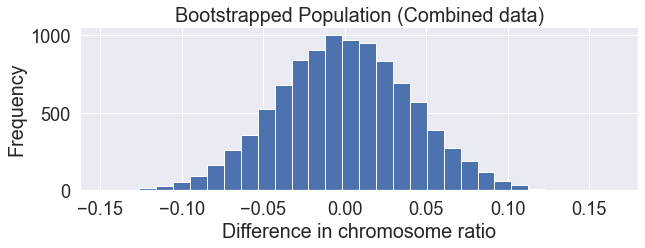

In [11]:
fig = plt.figure(figsize=(10,3))
ax = plt.hist(dif_bootstrap_means, bins=30)

plt.xlabel('Difference in chromosome ratio')
plt.ylabel('Frequency')
plt.title('Bootstrapped Population (Combined data)')
plt.show()

In [12]:
obs_difs = (np.mean(mutant_cluster1) - np.mean(wildtype_cluster1))
print('observed difference in means: {}'.format(obs_difs))

observed difference in means: -0.023903114032795658


In [13]:
p_value = dif_bootstrap_means[dif_bootstrap_means >= obs_difs].shape[0]/10000
print('p-value: {}'.format(p_value))

p-value: 0.7116


Now for all 5 clusters:

In [14]:
combined = np.concatenate((mutant_clusters[['cluster','ratio']], wildtype_clusters[['cluster','ratio']]), axis=0)

for cluster in data['cluster'].unique():
    print("Cluster ", cluster)
    perms_mutant = []
    perms_wildtype = []
    combined_cluster = combined[combined[:,0] == cluster][:,1] # only get the data for the corresponding cluster

    for i in range(10000):
        np.random.seed(i)
        perms_mutant.append(resample(combined_cluster, n_samples = len(mutant_clusters[mutant_clusters['cluster']==cluster])))
        perms_wildtype.append(resample(combined_cluster, n_samples = len(wildtype_clusters[wildtype_clusters['cluster']==cluster])))
    
    dif_bootstrap_means = (np.mean(perms_mutant, axis=1)-np.mean(perms_wildtype, axis=1))
    print(dif_bootstrap_means)
    obs_difs = (np.mean(mutant_clusters[mutant_clusters['cluster']==cluster]['ratio']) - np.mean(wildtype_clusters[wildtype_clusters['cluster']==cluster]['ratio']))
    print('observed difference in means: {}'.format(obs_difs))

    p_value = dif_bootstrap_means[dif_bootstrap_means >= obs_difs].shape[0]/10000
    print('p-value: {}'.format(p_value))

Cluster  1
[ 0.01405289 -0.04658984  0.02932613 ... -0.03210646 -0.02055581
 -0.01555257]
observed difference in means: -0.023903114032795658
p-value: 0.7116
Cluster  2
[ 0.00653594  0.00633239  0.01738171 ... -0.00660982 -0.05499084
 -0.0778312 ]
observed difference in means: 0.014350375564494477
p-value: 0.3212
Cluster  3
[ 0.02880528 -0.00830163  0.01402123 ... -0.02056623  0.0249653
  0.02792457]
observed difference in means: 0.05760710936421609
p-value: 0.0247
Cluster  4
[ 0.03599661  0.04694196 -0.01164927 ... -0.00853446 -0.07119084
 -0.01589697]
observed difference in means: 0.018122328274683297
p-value: 0.2468
Cluster  5
[-0.04888729 -0.02093894 -0.03162938 ...  0.02902727 -0.01948289
 -0.09365536]
observed difference in means: -0.010155825779908922
p-value: 0.6353
